In [107]:
# 2dbinned stats
import os
import numpy as np
import h5py
from scipy.stats import binned_statistic_2d
import pyproj
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfea
from pyproj import Transformer
# import MisrToolkit as Mtk
from datetime import datetime
import gc
import pandas as pd
from netCDF4 import Dataset
import xarray as xr
from joblib import dump, load
from scipy.interpolate import griddata



In [2]:
Globe = ccrs.Globe(ellipse='WGS84', towgs84=[0,0,0,0,0,0,0])
Projection = ccrs.LambertAzimuthalEqualArea(central_longitude=0.0, central_latitude=90.0, false_easting=0.0, false_northing=0.0, globe=Globe)



import cartopy.feature as cfeature
land_10m = cfeature.NaturalEarthFeature('physical', 'land', '10m',
edgecolor='face',
facecolor=cfeature.COLORS['land'])



land = cfeature.COASTLINE

In [3]:
# import numpy as np
# # import pandas as pd
# # import struct
# # import xarray as xr
# import matplotlib.pyplot as plt
# from mpl_toolkits.basemap import Basemap
# # import scipy.io
# # from scipy.sparse import spdiags
# # import pickle


# from netCDF4 import Dataset
# import matplotlib.pyplot as plt



# 1) Bathymetry 

In [4]:
#/Users/micheltsamados/Documents/Data/Bathymetry/BedmachineAntarctica/189467428/BedMachineAntarctica_2020-07-15_v02.nc

In [5]:
# path='/Users/micheltsamados/Documents/Data/Bathymetry/BedmachineAntarctica/189467428/'
# file='BedMachineAntarctica_2020-07-15_v02.nc'
# data=Dataset(path+file,"r")
# # SIC=np.asarray(data_SIC.variables['sic'])
# bathy=data.variables['bed']

In [103]:
def IBCAOtoEASE2(x0, y0):
    EASE2 = "+proj=laea +lon_0=0 +lat_0=90 +x_0=0 +y_0=0 +ellps=WGS84 +towgs84=0,0,0,0,0,0,0 +units=m +no_defs"
    IBCAO = "+proj=stere +lat_0=90 +lat_ts=75 +lon_0=0 +k=1 +x_0=0 +y_0=0 +datum=WGS84 +units=m +no_defs"
    transformer = Transformer.from_crs(IBCAO, EASE2)
    x1, y1 = transformer.transform(x0, y0)
    return x1, y1

def EASE2toIBCAO(x0, y0):
    EASE2 = "+proj=laea +lon_0=0 +lat_0=90 +x_0=0 +y_0=0 +ellps=WGS84 +towgs84=0,0,0,0,0,0,0 +units=m +no_defs"
    IBCAO = "+proj=stere +lat_0=90 +lat_ts=75 +lon_0=0 +k=1 +x_0=0 +y_0=0 +datum=WGS84 +units=m +no_defs"
    transformer = Transformer.from_crs(EASE2,IBCAO)
    x1, y1 = transformer.transform(x0, y0)
    return x1, y1


In [7]:
#Load IBCAO (Smith's) projection https://download.gebco.net/
# filepath2='/Users/micheltsamados/Dropbox/ThomasJohnson/MISR_bathymetry/'
# data2=Dataset(filepath2+'IBCAO_v4_200m.nc',"r") 
# data2=Dataset('/Users/micheltsamados/Dropbox/ThomasJohnson/MISR_bathymetry/IBCAO_v4_200m.nc',"r")
# depth2=data2.variables['z'][:,:]

# df = xr.open_dataset('/Users/micheltsamados/Dropbox/ThomasJohnson/MISR_bathymetry/IBCAO_v4_200m.nc')
df = xr.open_dataset('/Users/micheltsamados/Documents/Data/Bathymetry/IBCAO/IBCAO_v4_400m.nc')

In [6]:
! ls /Users/micheltsamados/Documents/Data/Bathymetry/IBCAO/

IBCAO_v4_200m.nc IBCAO_v4_400m.nc


In [8]:
# ! ls /Users/micheltsamados/Documents/Data/Bathymetry

In [9]:
df

<xarray.Dataset>
Dimensions:  (x: 14550, y: 14550)
Coordinates:
  * x        (x) float64 -2.91e+06 -2.909e+06 -2.909e+06 ... 2.909e+06 2.91e+06
  * y        (y) float64 -2.91e+06 -2.909e+06 -2.909e+06 ... 2.909e+06 2.91e+06
Data variables:
    z        (y, x) float32 ...
Attributes:
    Conventions:  COARDS, CF-1.5
    title:        Produced by grdconvert
    history:      grdconvert cut/ibcao_v4.0_400m.tiff=gd:gtiff cut/ibcao_v4.0...
    description:  
    GMT_version:  5.4.3 (r19528) [64-bit]
    node_offset:  1

In [10]:
# gebco_grid = Dataset('/Users/micheltsamados/Documents/Data/Bathymetry/gebco_2021_tid/GEBCO_2021_TID.nc')

In [11]:
# gebco_grid['tid']

In [12]:
# ! ls /Users/micheltsamados/Documents/Data/Bathymetry/gebco_2021_tid

In [13]:
# data2.variables.keys()

In [14]:
# bathy=data.variables['bed']

In [19]:
xtemp=np.linspace(-2910000., 2910000.,14550)
ytemp=np.linspace(-2910000., 2910000.,14550)

xtest2,ytest2=np.meshgrid(xtemp,ytemp)

In [20]:
xtest2.shape

(14550, 14550)

In [31]:
# import scipy.io
# from scipy.interpolate import griddata


# # xtest2, ytest = WGS84toEASE2(lon_TOPAZ, lat_TOPAZ)
# # xx, yy = WGS84toEASE2(lon, lat)


# # x, y = m(lon_Osisaf, lat_Osisaf)
# # x, y = m(lon, lat)
# depth_MISR2_nn=griddata((xtest2[::10,::10].ravel(), ytest2[::10,::10].ravel()),depth2[::10,::10].ravel(), (xx, yy), method='nearest')
 




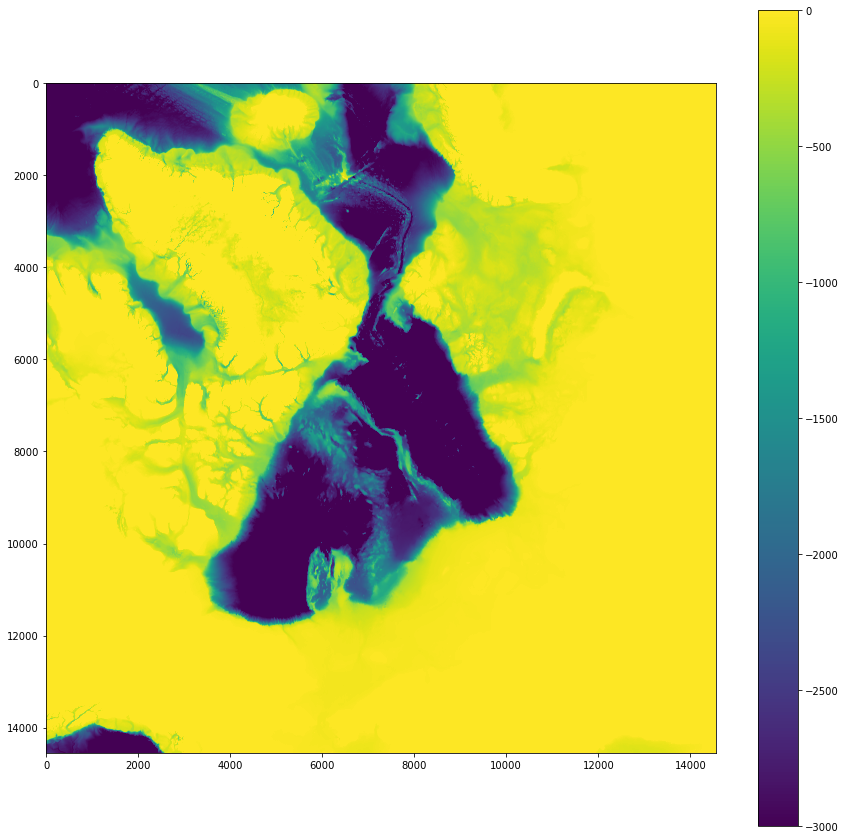

In [16]:
plt.clf()
plt.close()
plt.figure(figsize=(15,15))
plt.imshow(df.z,vmin=-3000,vmax=0)
plt.colorbar()

In [37]:
# plt.clf()
# plt.close()
# plt.figure(figsize=(15,15))
# s=10
# plt.imshow(depth2[::s,::s],vmin=-3000,vmax=0)
# # plt.pcolor(bathy_mask)
# plt.colorbar()

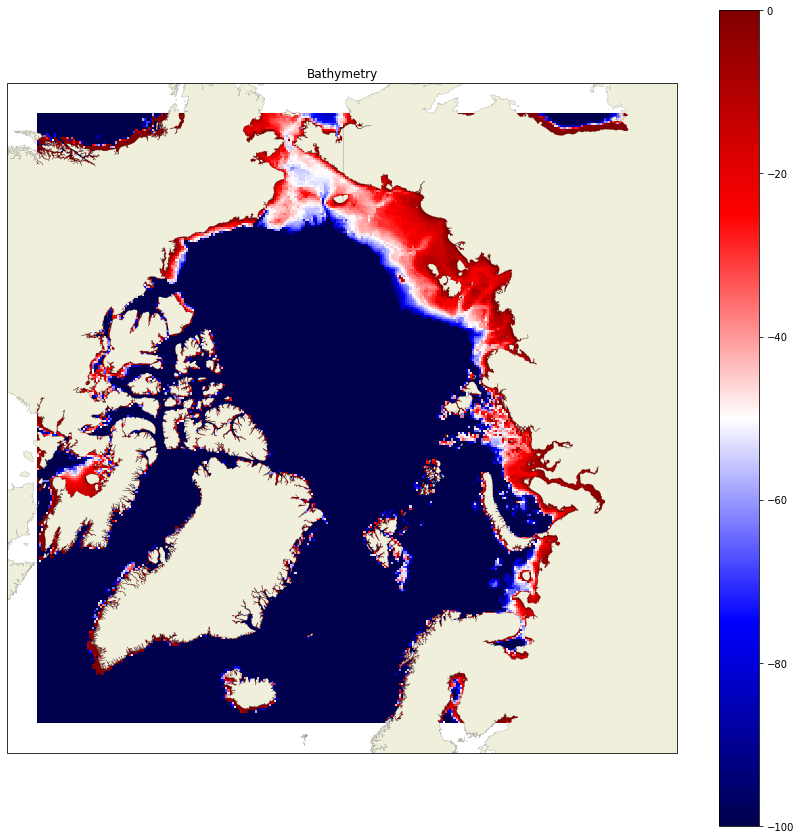

In [21]:
#400m 
plt.figure(figsize=(15,15))
ax = plt.axes(projection = Projection)
plt.title('Bathymetry')
s=50
plt.pcolormesh(xtest2[::s,::s], ytest2[::s,::s], df.z[::s,::s], zorder=0 ,vmin=-100, vmax=0, cmap='seismic')
ax.add_feature(land_10m, zorder=1, edgecolor='black', linewidth=0.1)
plt.colorbar()
# plt.savefig('Bathymetry_Arctic_small.png', dpi = 400)

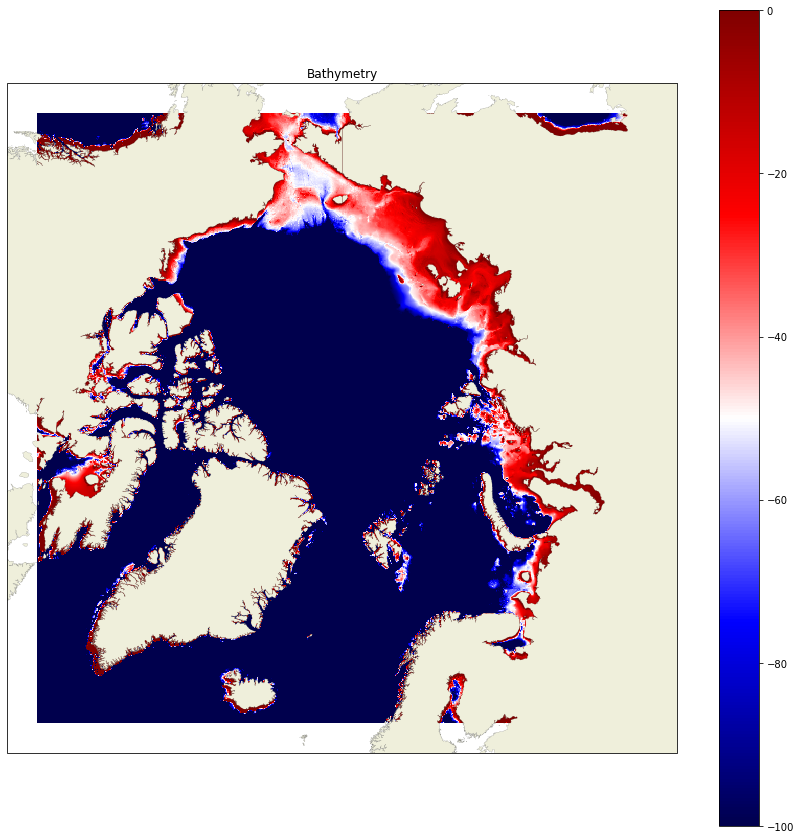

In [23]:
#200m 
plt.figure(figsize=(15,15))
ax = plt.axes(projection = Projection)
plt.title('Bathymetry')
s=50
plt.pcolormesh(xtest2[::s,::s], ytest2[::s,::s], df.z[::s,::s], zorder=0 ,vmin=-100, vmax=0, cmap='seismic')
ax.add_feature(land_10m, zorder=1, edgecolor='black', linewidth=0.1)
plt.colorbar()
# plt.savefig('Bathymetry_Arctic_small.png', dpi = 400)

In [22]:
depth2_grad = np.gradient(df.z)
depth2_grad_mag=depth2_grad[0]**2.+depth2_grad[1]**2.

(14550, 14550)

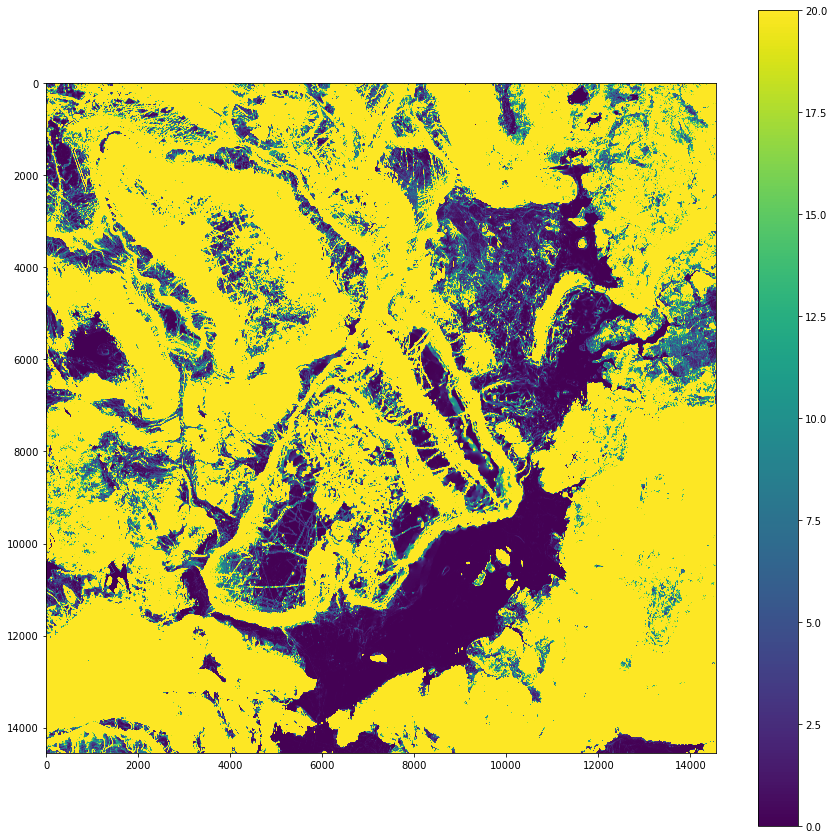

In [23]:
plt.clf()
plt.close()
plt.figure(figsize=(15,15))
plt.imshow(depth2_grad_mag,vmin=0,vmax=20)
plt.colorbar()

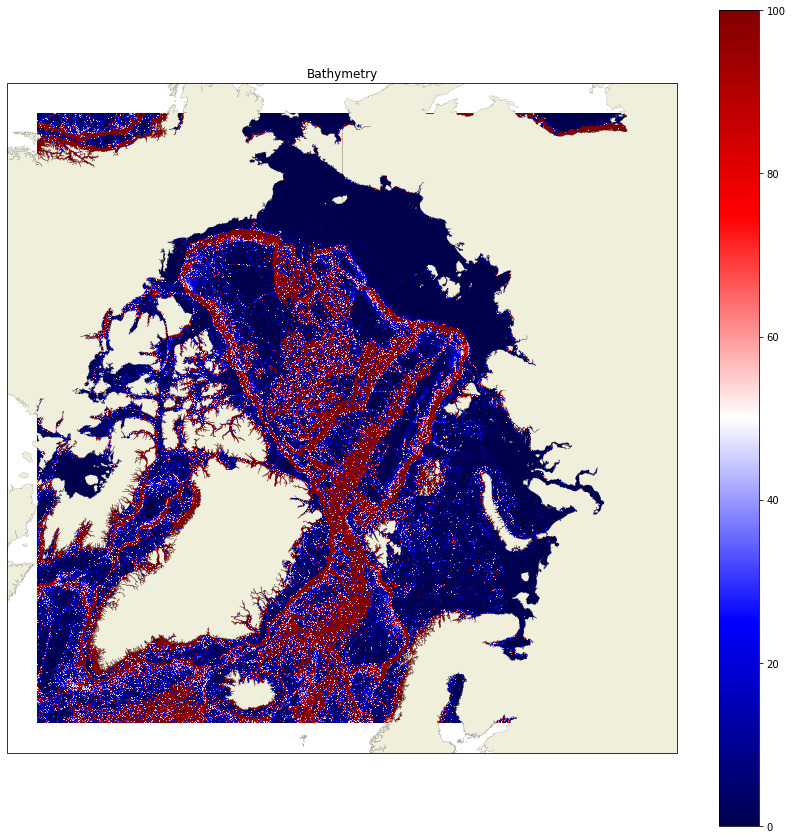

In [111]:
plt.figure(figsize=(15,15))
ax = plt.axes(projection = Projection)
plt.title('Bathymetry')
s=5
plt.pcolormesh(xtest2[::s,::s], ytest2[::s,::s], depth2_grad_mag[::s,::s], zorder=0 ,vmin=0, vmax=100, cmap='seismic')
# plt.pcolormesh(xtest2[::s,::s], ytest2[::s,::s], depth2_grad_mag[::s,::s], zorder=0 ,vmin=0, vmax=100, cmap='seismic')
ax.add_feature(land_10m, zorder=1, edgecolor='black', linewidth=0.1)
plt.colorbar()
# plt.savefig('Bathymetry_Arctic_grad_small.png', dpi = 400)

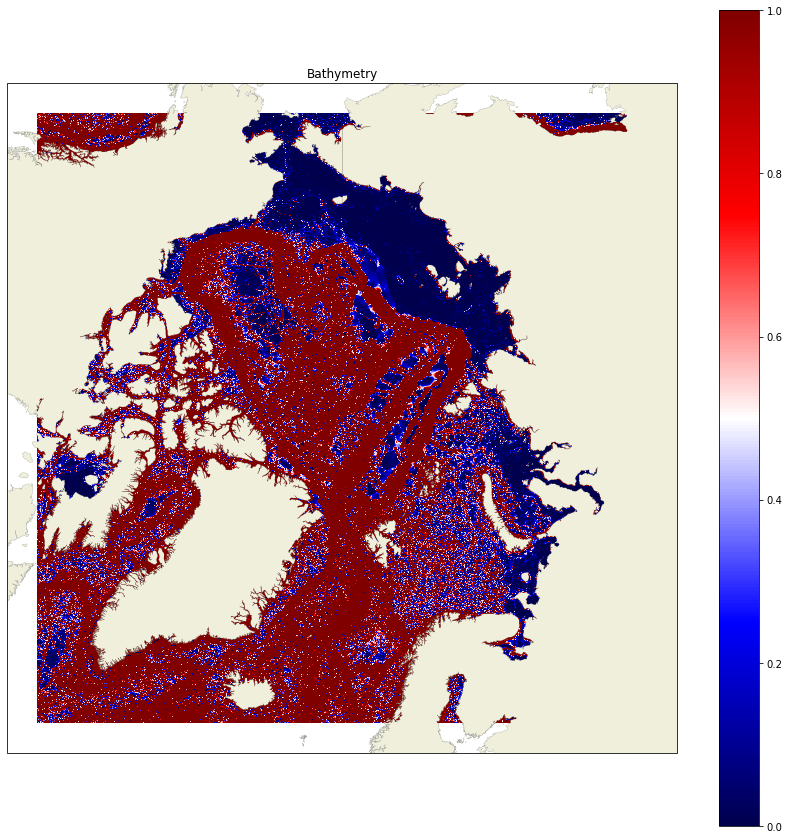

In [51]:
plt.figure(figsize=(15,15))
ax = plt.axes(projection = Projection)
plt.title('Bathymetry')
s=5
plt.pcolormesh(xtest2[::s,::s], ytest2[::s,::s], depth2_grad_mag[::s,::s], zorder=0 ,vmin=0, vmax=1, cmap='seismic')
ax.add_feature(land_10m, zorder=1, edgecolor='black', linewidth=0.1)
plt.colorbar()
plt.savefig('Bathymetry_Arctic_grad_small3.png', dpi = 400)

In [ ]:
plt.figure(figsize=(15,15))
ax = plt.axes(projection = Projection)
plt.title('Bathymetry')
s=2
plt.pcolormesh(xtest2[::s,::s], ytest2[::s,::s], depth2_grad_mag[::s,::s], zorder=0 ,vmin=0, vmax=1000, cmap='seismic')
ax.add_feature(land_10m, zorder=1, edgecolor='black', linewidth=0.1)
plt.colorbar()
plt.savefig('Bathymetry_Arctic_grad_fine.png', dpi = 400)

# 2) Roughness

In [27]:
! pwd

/Users/micheltsamados/My Drive/ADMINISTRATION/ESA_ITT_ALBATROS_Tides/PM2_20211201


In [26]:
! ls /Volumes/Roughness/Arctic/Climatology/

April 2000_2020 Roughness.h5            Climatology_April_2000_2020_Seismic.png
Climatology_April_2000_2020_Plasma.png


In [200]:
# path2='/Users/micheltsamados/Documents/Data/MISR_roughness/Antarctic/'

# ROUGHNESS_DIR = '/Users/micheltsamados/Dropbox/ThomasJohnson/MISR_bathymetry/'
# ROUGHNESS_DIR = '/Volumes/Roughness/Arctic/Climatology/'
ROUGHNESS_DIR = '/Volumes/Roughness/Arctic/2019/04/'
# ROUGHNESS_DIR = '/Users/micheltsamados/Desktop/'

In [77]:
# Define some stuff
Globe = ccrs.Globe(ellipse='WGS84', towgs84=[0,0,0,0,0,0,0])
Projection = ccrs.LambertAzimuthalEqualArea(central_longitude=0.0, central_latitude=90.0, false_easting=0.0, false_northing=0.0, globe=Globe)
os.chdir(ROUGHNESS_DIR)

import cartopy.feature as cfeature
land_10m = cfeature.NaturalEarthFeature('physical', 'land', '10m',
                                        edgecolor='face',
                                        facecolor=cfeature.COLORS['land'])

land = cfeature.COASTLINE

In [201]:
import h5py

def LoadH5(h5name, h5file):
    HDF5 = h5file.get(h5name)
    NP = np.array(HDF5)
    return NP

# Old pyproj conversion fns - for compatibility with lower versions of pyproj used in basemap
def EASE2toWGS84(x, y):
    proj_EASE2 = pyproj.Proj("+proj=laea +lon_0=0 +lat_0=90 +x_0=0 +y_0=0 +ellps=WGS84 +towgs84=0,0,0,0,0,0,0 +units=m +no_defs")
    proj_WGS84 = pyproj.Proj("+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs ")
    lon, lat = pyproj.transform(proj_EASE2, proj_WGS84, x, y)
    return lon, lat

def WGS84toEASE2(lon, lat):
    proj_EASE2 = pyproj.Proj("+proj=laea +lon_0=0 +lat_0=90 +x_0=0 +y_0=0 +ellps=WGS84 +towgs84=0,0,0,0,0,0,0 +units=m +no_defs")
    proj_WGS84 = pyproj.Proj("+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs ")
    x , y = pyproj.transform(proj_WGS84, proj_EASE2, lon, lat)
    return x, y

In [202]:
! ls /Volumes/Roughness/Arctic/2019/04

2019_April_Roughness_Count.png
2019_April_Roughness_CountMasked_Plasma.png
2019_April_Roughness_CountMasked_Seismic.png
2019_April_Roughness_Mean_Plasma.png
2019_April_Roughness_Mean_Seismic.png
2019_MISR_Roughness_01_15_ALL_1km.pkl
2019_MISR_Roughness_01_15_MEAN_1km.pkl
April 2019 Roughness.h5
MISR_ARCTIC_ROUGHNESS_20190401_P004_O102582_012_045.hdf
MISR_ARCTIC_ROUGHNESS_20190401_P020_O102583_012_045.hdf
MISR_ARCTIC_ROUGHNESS_20190401_P036_O102584_012_045.hdf
MISR_ARCTIC_ROUGHNESS_20190401_P052_O102585_012_045.hdf
MISR_ARCTIC_ROUGHNESS_20190401_P068_O102586_012_045.hdf
MISR_ARCTIC_ROUGHNESS_20190401_P084_O102587_012_045.hdf
MISR_ARCTIC_ROUGHNESS_20190401_P109_O102574_012_045.hdf
MISR_ARCTIC_ROUGHNESS_20190401_P125_O102575_012_045.hdf
MISR_ARCTIC_ROUGHNESS_20190401_P141_O102576_012_045.hdf
MISR_ARCTIC_ROUGHNESS_20190401_P157_O102577_012_045.hdf
MISR_ARCTIC_ROUGHNESS_20190401_P173_O102578_012_045.hdf
MISR_ARCTIC_ROUGHNESS_20190401_P189_O102579_012_045.hdf
MISR_ARCTIC_ROUGHNESS_20190401_P

In [203]:
# h5name = ROUGHNESS_DIR+'April 2000_2020 Roughness.h5'
h5name = ROUGHNESS_DIR+'April 2019 Roughness.h5'
# h = h5py.File(h5name, 'r')
h201904 = h5py.File(h5name, 'r')





In [207]:
h201904.keys()

<KeysViewHDF5 ['Count', 'GeoLocation', 'Roughness']>

In [204]:
h201904['GeoLocation'].keys()

<KeysViewHDF5 ['Latitude', 'Longitude', 'x', 'y']>

In [169]:
! ls /Volumes/Roughness/Arctic/2019/04/

2019_April_Roughness_Count.png
2019_April_Roughness_CountMasked_Plasma.png
2019_April_Roughness_CountMasked_Seismic.png
2019_April_Roughness_Mean_Plasma.png
2019_April_Roughness_Mean_Seismic.png
2019_MISR_Roughness_01_15_ALL_1km.pkl
2019_MISR_Roughness_01_15_MEAN_1km.pkl
April 2019 Roughness.h5
MISR_ARCTIC_ROUGHNESS_20190401_P004_O102582_012_045.hdf
MISR_ARCTIC_ROUGHNESS_20190401_P020_O102583_012_045.hdf
MISR_ARCTIC_ROUGHNESS_20190401_P036_O102584_012_045.hdf
MISR_ARCTIC_ROUGHNESS_20190401_P052_O102585_012_045.hdf
MISR_ARCTIC_ROUGHNESS_20190401_P068_O102586_012_045.hdf
MISR_ARCTIC_ROUGHNESS_20190401_P084_O102587_012_045.hdf
MISR_ARCTIC_ROUGHNESS_20190401_P109_O102574_012_045.hdf
MISR_ARCTIC_ROUGHNESS_20190401_P125_O102575_012_045.hdf
MISR_ARCTIC_ROUGHNESS_20190401_P141_O102576_012_045.hdf
MISR_ARCTIC_ROUGHNESS_20190401_P157_O102577_012_045.hdf
MISR_ARCTIC_ROUGHNESS_20190401_P173_O102578_012_045.hdf
MISR_ARCTIC_ROUGHNESS_20190401_P189_O102579_012_045.hdf
MISR_ARCTIC_ROUGHNESS_20190401_P

In [60]:
lat

array(None, dtype=object)

In [208]:
# h5name = ROUGHNESS_DIR+'April '+str(2016)+' Monthly Binned.h5'
# h5name = '/Users/micheltsamados/Dropbox/ThomasJohnson/MISR_bathymetry/April 2016 Monthly Binned.h5'
# h5name = ROUGHNESS_DIR+'April Monthly Binned_ALL.h5'
# h5name = ROUGHNESS_DIR+'April 2000_2020 Roughness.h5'
h5name = ROUGHNESS_DIR+'April 2019 Roughness.h5'
# h = h5py.File(h5name, 'r')
h201904 = h5py.File(h5name, 'r')

x_edge = LoadH5('GeoLocation/x', h)
y_edge = LoadH5('GeoLocation/y', h)
# lat = LoadH5('GeoLocation/Latitude', h)
# lon = LoadH5('GeoLocation/Longitude', h)
# xx, yy = WGS84toEASE2(lon, lat)
# roughness = LoadH5('Roughness/Roughness_2D_svm', h)
# count = LoadH5('Count/Count_2D_svm', h)
# std = LoadH5('Std/Std_2D_svm', h)

roughness_201904 = LoadH5('Roughness/Roughness_2D_svm', h201904)
count_201904 = LoadH5('Count/Count_2D_svm', h201904)
# std = LoadH5('Std/Std_2D_svm', h)

In [86]:
x_MISR=x_edge
y_MISR=y_edge.T

In [104]:
#project and interpolate onto IBCO grid 
x_MISR_IBCAO, y_MISR_IBCAO = EASE2toIBCAO(x_MISR, y_MISR) #EASE2 to IBCAO

In [108]:
#5mins 
roughness_IBCAO=griddata((x_MISR_IBCAO.ravel(),y_MISR_IBCAO.ravel()),np.asarray(roughness).ravel(),(xtest2,ytest2),method='nearest')



In [209]:
#5mins 
roughness_201904_IBCAO=griddata((x_MISR_IBCAO.ravel(),y_MISR_IBCAO.ravel()),np.asarray(roughness_201904).ravel(),(xtest2,ytest2),method='nearest')
count_201904_IBCAO=griddata((x_MISR_IBCAO.ravel(),y_MISR_IBCAO.ravel()),np.asarray(count_201904).ravel(),(xtest2,ytest2),method='nearest')




In [105]:
# x_edge

In [63]:
roughness.shape

(8000, 8000)

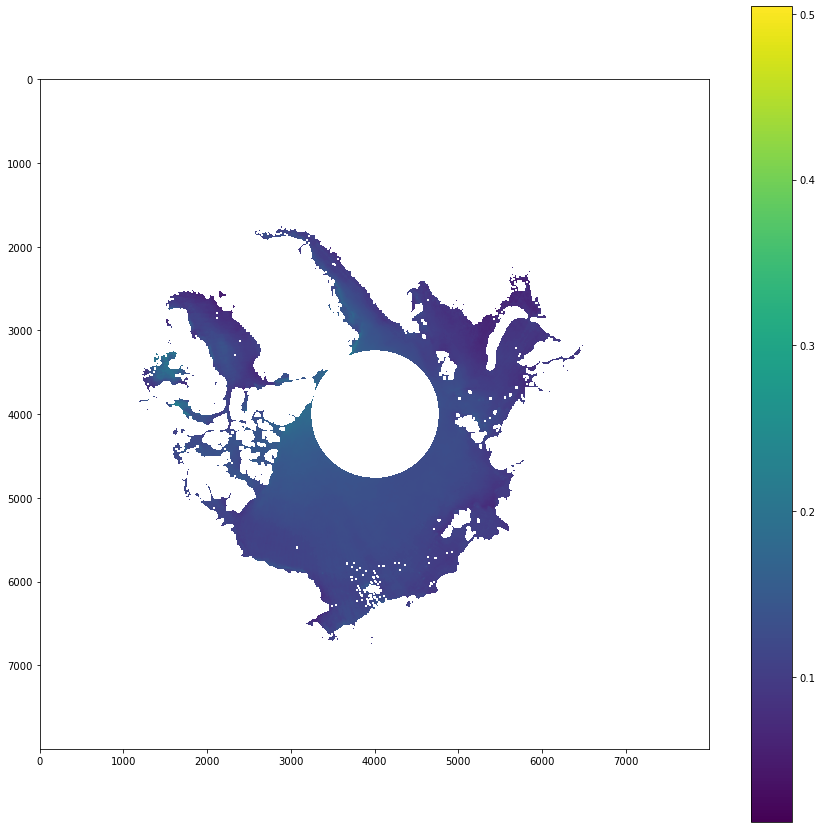

In [94]:
plt.clf()
plt.close()
plt.figure(figsize=(15,15))
plt.imshow(roughness)#,vmin=-3000,vmax=0)
plt.colorbar()

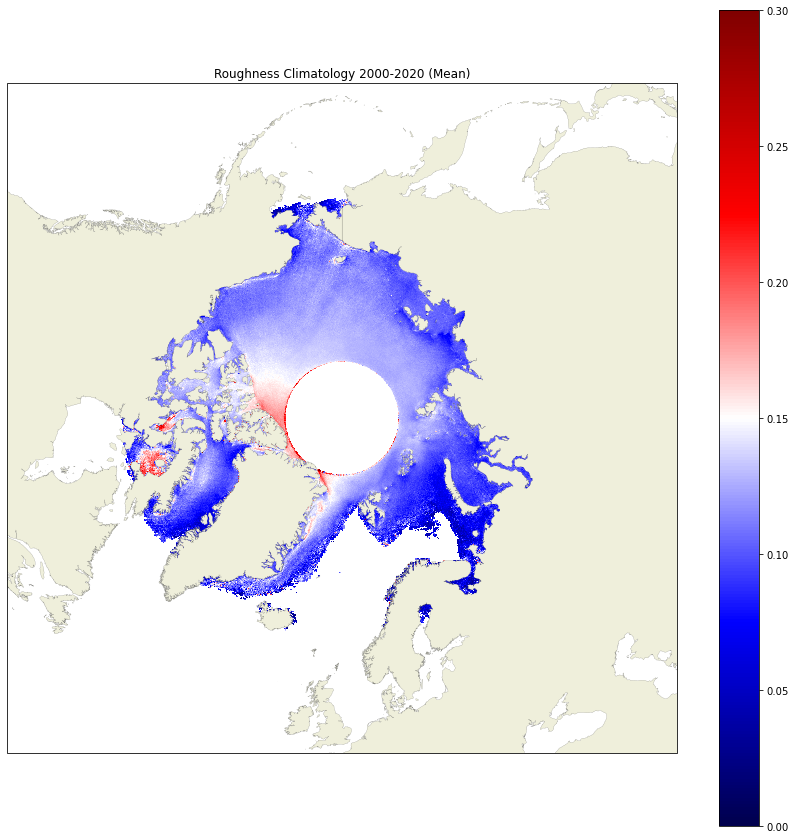

In [87]:
plt.figure(figsize=(15,15))

ax = plt.axes(projection = Projection)
# plt.title('Average Roughness 2016 (Mean)')
plt.title('Roughness Climatology 2000-2020 (Mean)')

s=2
plt.pcolormesh(x_MISR[::s,::s], y_MISR[::s,::s], roughness[::s,::s], zorder=0 ,vmin=0, vmax=0.3, cmap='seismic')
ax.add_feature(land_10m, zorder=1, edgecolor='black', linewidth=0.1)
plt.colorbar()
# plt.savefig('A_2016_Roughness_Mean_fine.png', dpi = 400)




In [89]:
r_grad = np.gradient(roughness)
roughness_grad=r_grad[0]**2.+r_grad[1]**2.

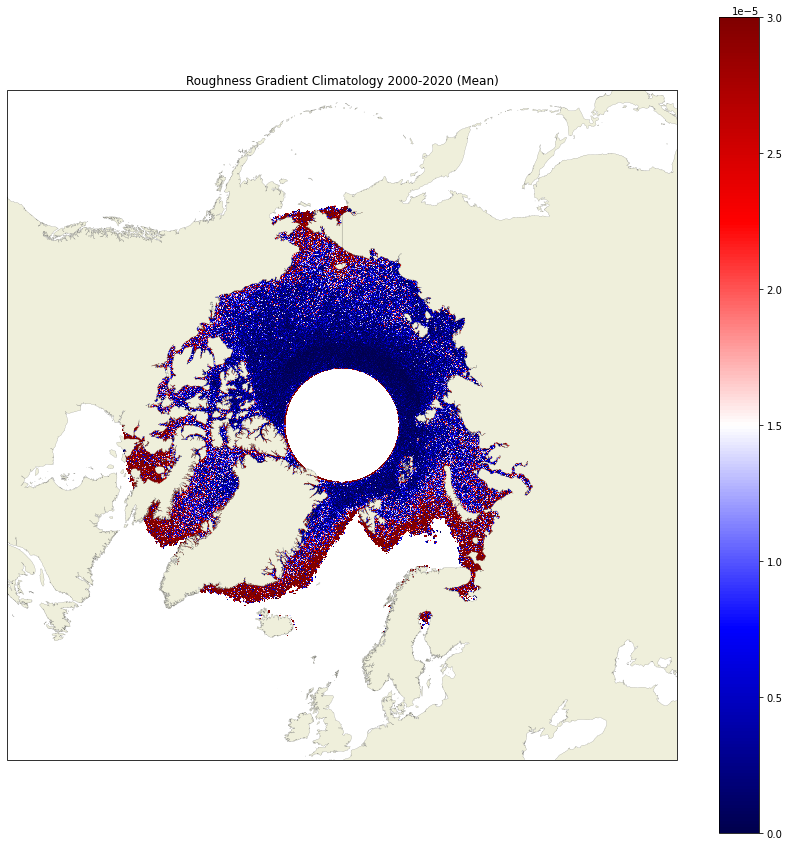

In [93]:
plt.figure(figsize=(15,15))

ax = plt.axes(projection = Projection)
# plt.title('Average Roughness 2016 (Mean)')
plt.title('Roughness Gradient Climatology 2000-2020 (Mean)')

s=2
plt.pcolormesh(x_MISR[::s,::s], y_MISR[::s,::s], roughness_grad[::s,::s], zorder=0 ,vmin=0, vmax=3e-5, cmap='seismic')
ax.add_feature(land_10m, zorder=1, edgecolor='black', linewidth=0.1)
plt.colorbar()
# plt.savefig('A_2016_Roughness_Mean_fine.png', dpi = 400)





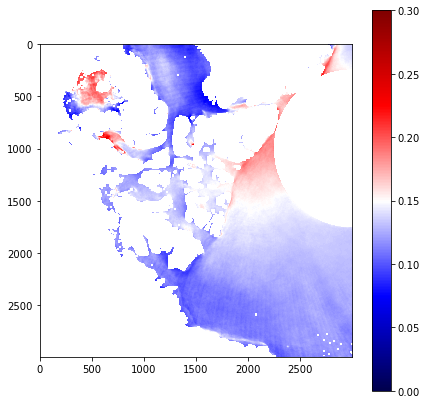

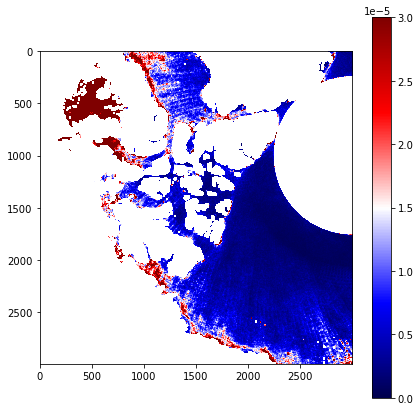

In [100]:
plt.clf()
plt.close()
plt.figure(figsize=(7,7))
ix1=3000
ix2=6000
iy1=1000
iy2=4000
plt.imshow((roughness)[ix1:ix2,iy1:iy2],vmin=0,vmax=0.3, cmap='seismic')
# plt.imshow(np.swapaxes(std_201710,0,1))#,vmin=0,vmax=10)
# plt.imshow(std_201710_bed)
# plt.pcolor(bathy_mask)
plt.colorbar()
# plt.savefig('std_201710_tiny.png', dpi = 400)

plt.show()

plt.figure(figsize=(7,7))
ix1=3000
ix2=6000
iy1=1000
iy2=4000
plt.imshow((roughness_grad)[ix1:ix2,iy1:iy2],vmin=0,vmax=3e-5, cmap='seismic')
# plt.imshow(np.swapaxes(std_201710,0,1))#,vmin=0,vmax=10)
# plt.imshow(std_201710_bed)
# plt.pcolor(bathy_mask)
plt.colorbar()
# plt.savefig('std_201710_tiny.png', dpi = 400)

In [110]:
roughness_IBCAO.shape

(14550, 14550)

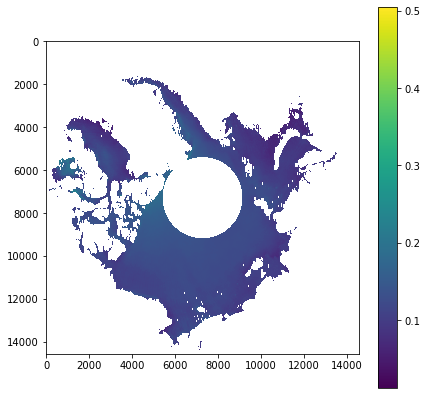

In [112]:
plt.clf()
plt.close()
plt.figure(figsize=(7,7))
plt.imshow(roughness_IBCAO)#,vmin=-3000,vmax=0)
plt.colorbar()

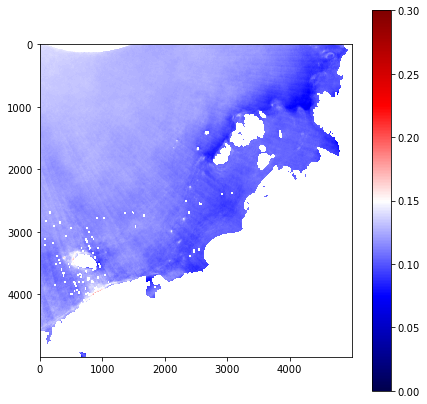

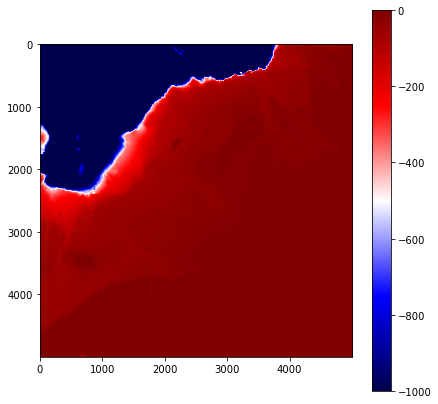

In [140]:
plt.clf()
plt.close()
plt.figure(figsize=(7,7))
ix1=9000
ix2=14000
iy1=6500
iy2=11500
plt.imshow((roughness_IBCAO)[ix1:ix2,iy1:iy2],vmin=0,vmax=0.3, cmap='seismic')
# plt.imshow(np.swapaxes(std_201710,0,1))#,vmin=0,vmax=10)
# plt.imshow(std_201710_bed)
# plt.pcolor(bathy_mask)
plt.colorbar()
# plt.savefig('std_201710_tiny.png', dpi = 400)

plt.show()

plt.figure(figsize=(7,7))
plt.imshow((df.z)[ix1:ix2,iy1:iy2],vmin=-1000,vmax=0, cmap='seismic')
# plt.imshow(np.swapaxes(std_201710,0,1))#,vmin=0,vmax=10)
# plt.imshow(std_201710_bed)
# plt.pcolor(bathy_mask)
plt.colorbar()
# plt.savefig('std_201710_tiny.png', dpi = 400)

In [119]:
xtest2.shape

(14550, 14550)

In [125]:
r_grad_IBCAO = np.gradient(roughness_IBCAO)
roughness_grad_IBCAO=r_grad_IBCAO[0]**2.+r_grad_IBCAO[1]**2.

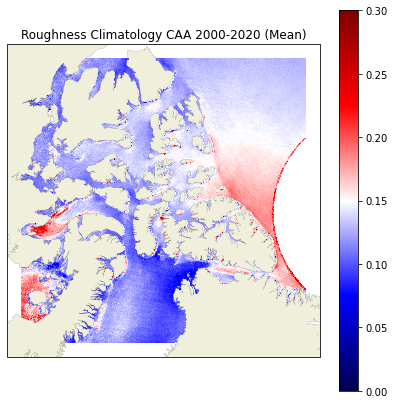

In [129]:
plt.figure(figsize=(7,7))
ix1=5000
ix2=10000
iy1=1000
iy2=6000
ax = plt.axes(projection = Projection)
# plt.title('Average Roughness 2016 (Mean)')
plt.title('Roughness Climatology CAA 2000-2020 (Mean)')

# s=1
plt.pcolormesh(xtest2[ix1:ix2,iy1:iy2], ytest2[ix1:ix2,iy1:iy2], roughness_IBCAO[ix1:ix2,iy1:iy2], zorder=0 ,vmin=0, vmax=0.3, cmap='seismic')
ax.add_feature(land_10m, zorder=1, edgecolor='black', linewidth=0.1)
plt.colorbar()
plt.savefig('Roughness_clim_CAA_large.png', dpi = 1400)




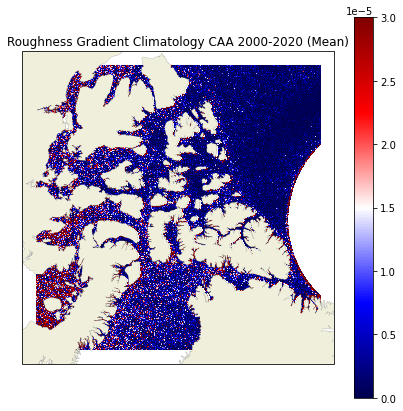

In [130]:
plt.figure(figsize=(7,7))
ix1=5000
ix2=10000
iy1=1000
iy2=6000
ax = plt.axes(projection = Projection)
# plt.title('Average Roughness 2016 (Mean)')
plt.title('Roughness Gradient Climatology CAA 2000-2020 (Mean)')

# s=1
plt.pcolormesh(xtest2[ix1:ix2,iy1:iy2], ytest2[ix1:ix2,iy1:iy2], roughness_grad_IBCAO[ix1:ix2,iy1:iy2], zorder=0 ,vmin=0, vmax=3e-5, cmap='seismic')
ax.add_feature(land_10m, zorder=1, edgecolor='black', linewidth=0.1)
plt.colorbar()
plt.savefig('Roughness_gradient_clim_CAA_large.png', dpi = 1400)



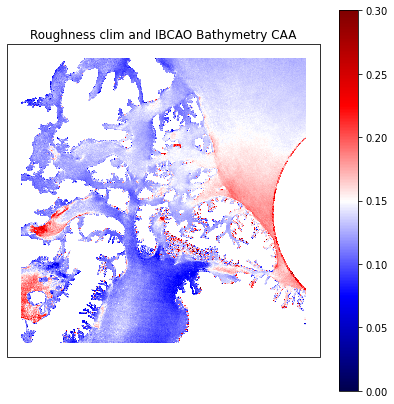

In [171]:
plt.figure(figsize=(7,7))
#CAA
ix1=5000
ix2=10000
iy1=1000
iy2=6000
#Russian shelves
# ix1=9000
# ix2=14000
# iy1=6500
# iy2=11500
ax = plt.axes(projection = Projection)
# plt.title('Average Roughness 2016 (Mean)')
plt.title('Roughness clim and IBCAO Bathymetry CAA')

#CAA
# levels = [-3000,-2500,-2000,-1500,-1000,-750,-500,-400,-300,-200,-150,-100,-75,-50,-25,0]
#Russia
levels = [-3000,-2500,-2000,-1500,-1000,-750,-500,-400,-300,-200,-150,-100,-80,-60,-50,-40,-30,-20,-10,0]

# levels = np.arange(-1000, 0, 50)
plt.pcolormesh(xtest2[ix1:ix2,iy1:iy2], ytest2[ix1:ix2,iy1:iy2], roughness_IBCAO[ix1:ix2,iy1:iy2], zorder=0 ,vmin=0, vmax=0.3, cmap='seismic')
# plt.contour(xtest2[ix1:ix2,iy1:iy2], ytest2[ix1:ix2,iy1:iy2], df.z[ix1:ix2,iy1:iy2], levels, vmin=-1000, vmax=0, linewidths=0.2, alpha=0.3, cmap='seismic')
# plt.pcolormesh(xtest2[ix1:ix2,iy1:iy2], ytest2[ix1:ix2,iy1:iy2], df.z[ix1:ix2,iy1:iy2], zorder=0 ,vmin=-1000, vmax=0, cmap='seismic')
# ax.add_feature(land_10m, zorder=1, edgecolor='black', linewidth=0.02)
plt.colorbar()
plt.savefig('Roughness_IBCAO_bathy_CAA_large_alpha.png', dpi = 1400)
# plt.savefig('Roughness_IBCAO_bathy_CAA_contourf_large_alpha.png', dpi = 1400)
# plt.savefig('Roughness_IBCAO_bathy_Russia_contourf_large_alpha.png', dpi = 1400)




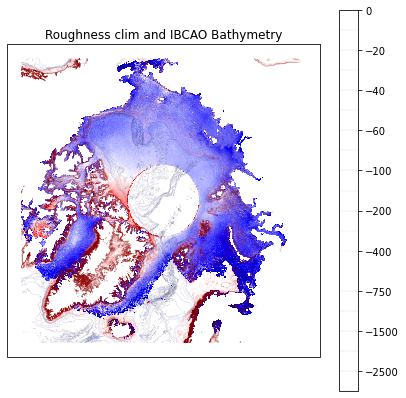

In [150]:
plt.figure(figsize=(7,7))

ax = plt.axes(projection = Projection)
# plt.title('Average Roughness 2016 (Mean)')
plt.title('Roughness clim and IBCAO Bathymetry')

#CAA
# levels = [-3000,-2500,-2000,-1500,-1000,-750,-500,-400,-300,-200,-150,-100,-75,-50,-25,0]
#Russia
levels = [-3000,-2500,-2000,-1500,-1000,-750,-500,-400,-300,-200,-150,-100,-80,-60,-50,-40,-30,-20,-10,0]

# levels = np.arange(-1000, 0, 50)
plt.pcolormesh(xtest2, ytest2, roughness_IBCAO, zorder=0 ,vmin=0, vmax=0.3, cmap='seismic')
plt.contour(xtest2, ytest2, df.z, levels, vmin=-1000, vmax=0, linewidths=0.2, alpha=0.3, cmap='seismic')
# plt.pcolormesh(xtest2[ix1:ix2,iy1:iy2], ytest2[ix1:ix2,iy1:iy2], df.z[ix1:ix2,iy1:iy2], zorder=0 ,vmin=-1000, vmax=0, cmap='seismic')
# ax.add_feature(land_10m, zorder=1, edgecolor='black', linewidth=0.02)
plt.colorbar()
plt.savefig('Roughness_IBCAO_bathy_panArctic_contourf_large_alpha.png', dpi = 1400)
# plt.savefig('Roughness_IBCAO_bathy_Russia_contourf_large_alpha.png', dpi = 1400)





In [ ]:
plt.figure(figsize=(7,7))
ix1=5000
ix2=10000
iy1=1000
iy2=6000
ax = plt.axes(projection = Projection)
# plt.title('Average Roughness 2016 (Mean)')
plt.title('IBCAO Bathymetry CAA')

levels = [-3000,-2500,-2000,-1500,-1000,-750,-500,-400,-300,-200,-150,-100,-75,-50,-25,0]
# levels = np.arange(-1000, 0, 50)
plt.contour(xtest2[ix1:ix2,iy1:iy2], ytest2[ix1:ix2,iy1:iy2], df.z[ix1:ix2,iy1:iy2], levels, vmin=-1000, vmax=0, linewidths=0.2, cmap='seismic')
# plt.pcolormesh(xtest2[ix1:ix2,iy1:iy2], ytest2[ix1:ix2,iy1:iy2], df.z[ix1:ix2,iy1:iy2], zorder=0 ,vmin=-1000, vmax=0, cmap='seismic')
ax.add_feature(land_10m, zorder=1, edgecolor='black', linewidth=0.02)
plt.colorbar()
plt.savefig('IBCAO_bathy_CAA_contourf_large.png', dpi = 1400)





In [ ]:
#201904

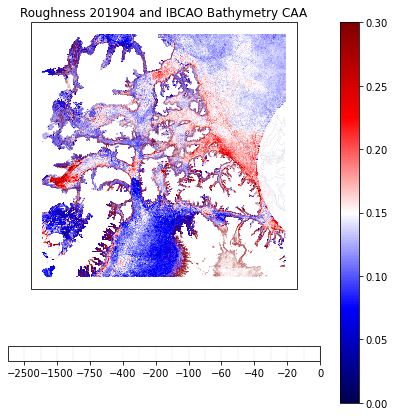

In [210]:
plt.figure(figsize=(7,7))
#CAA
ix1=5000
ix2=10000
iy1=1000
iy2=6000
#Russian shelves
# ix1=9000
# ix2=14000
# iy1=6500
# iy2=11500
ax = plt.axes(projection = Projection)
# plt.title('Average Roughness 2016 (Mean)')
plt.title('Roughness 201904 and IBCAO Bathymetry CAA')

#CAA
# levels = [-3000,-2500,-2000,-1500,-1000,-750,-500,-400,-300,-200,-150,-100,-75,-50,-25,0]
#Russia
levels = [-3000,-2500,-2000,-1500,-1000,-750,-500,-400,-300,-200,-150,-100,-80,-60,-50,-40,-30,-20,-10,0]

# levels = np.arange(-1000, 0, 50)
C = ax.pcolormesh(xtest2[ix1:ix2,iy1:iy2], ytest2[ix1:ix2,iy1:iy2], roughness_201904_IBCAO[ix1:ix2,iy1:iy2], zorder=0 ,vmin=0, vmax=0.3, cmap='seismic')
C2 = ax.contour(xtest2[ix1:ix2,iy1:iy2], ytest2[ix1:ix2,iy1:iy2], df.z[ix1:ix2,iy1:iy2], levels, vmin=-1000, vmax=0, linewidths=0.2, alpha=0.3, cmap='seismic')
# plt.pcolormesh(xtest2[ix1:ix2,iy1:iy2], ytest2[ix1:ix2,iy1:iy2], df.z[ix1:ix2,iy1:iy2], zorder=0 ,vmin=-1000, vmax=0, cmap='seismic')
# ax.add_feature(land_10m, zorder=1, edgecolor='black', linewidth=0.02)

plt.colorbar(C, orientation='vertical')
plt.colorbar(C2, orientation='horizontal')

plt.savefig('Roughness_201904_IBCAO_bathy_CAA_large_alpha.png', dpi = 1400)
# plt.savefig('Roughness_IBCAO_bathy_CAA_contourf_large_alpha.png', dpi = 1400)
# plt.savefig('Roughness_IBCAO_bathy_Russia_contourf_large_alpha.png', dpi = 1400)

           


In [ ]:
plt.figure(figsize=(7,7))

ax = plt.axes(projection = Projection)
# plt.title('Average Roughness 2016 (Mean)')
plt.title('Roughness 201904 and IBCAO Bathymetry')

#CAA
# levels = [-3000,-2500,-2000,-1500,-1000,-750,-500,-400,-300,-200,-150,-100,-75,-50,-25,0]
#Russia
levels = [-3000,-2500,-2000,-1500,-1000,-750,-500,-400,-300,-200,-150,-100,-80,-60,-50,-40,-30,-20,-10,0]

# levels = np.arange(-1000, 0, 50)
C = ax.pcolormesh(xtest2, ytest2, roughness_201904_IBCAO, zorder=0 ,vmin=0, vmax=0.3, cmap='seismic')
C2 = ax.contour(xtest2, ytest2, df.z, levels, vmin=-1000, vmax=0, linewidths=0.05, alpha=1., cmap='seismic')
# plt.pcolormesh(xtest2[ix1:ix2,iy1:iy2], ytest2[ix1:ix2,iy1:iy2], df.z[ix1:ix2,iy1:iy2], zorder=0 ,vmin=-1000, vmax=0, cmap='seismic')
# ax.add_feature(land_10m, zorder=1, edgecolor='black', linewidth=0.02)

plt.colorbar(C, orientation='vertical')
plt.colorbar(C2, orientation='horizontal')

plt.savefig('Roughness_201904_IBCAO_bathy_panArctic_large_alpha.png', dpi = 1400)
# plt.savefig('Roughness_IBCAO_bathy_CAA_contourf_large_alpha.png', dpi = 1400)
# plt.savefig('Roughness_IBCAO_bathy_Russia_contourf_large_alpha.png', dpi = 1400)

           



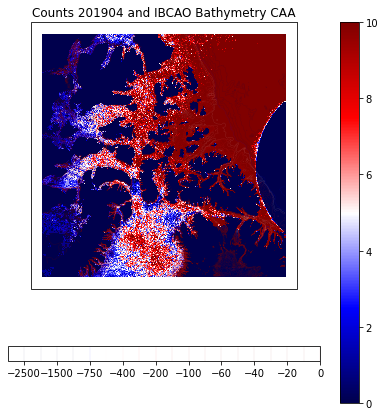

In [211]:
plt.figure(figsize=(7,7))
#CAA
ix1=5000
ix2=10000
iy1=1000
iy2=6000
#Russian shelves
# ix1=9000
# ix2=14000
# iy1=6500
# iy2=11500
ax = plt.axes(projection = Projection)
# plt.title('Average Roughness 2016 (Mean)')
plt.title('Counts 201904 and IBCAO Bathymetry CAA')

#CAA
# levels = [-3000,-2500,-2000,-1500,-1000,-750,-500,-400,-300,-200,-150,-100,-75,-50,-25,0]
#Russia
levels = [-3000,-2500,-2000,-1500,-1000,-750,-500,-400,-300,-200,-150,-100,-80,-60,-50,-40,-30,-20,-10,0]

# levels = np.arange(-1000, 0, 50)
C = ax.pcolormesh(xtest2[ix1:ix2,iy1:iy2], ytest2[ix1:ix2,iy1:iy2], count_201904_IBCAO[ix1:ix2,iy1:iy2], zorder=0 ,vmin=0, vmax=10, cmap='seismic')
C2 = ax.contour(xtest2[ix1:ix2,iy1:iy2], ytest2[ix1:ix2,iy1:iy2], df.z[ix1:ix2,iy1:iy2], levels, vmin=-1000, vmax=0, linewidths=0.2, alpha=0.3, cmap='seismic')
# plt.pcolormesh(xtest2[ix1:ix2,iy1:iy2], ytest2[ix1:ix2,iy1:iy2], df.z[ix1:ix2,iy1:iy2], zorder=0 ,vmin=-1000, vmax=0, cmap='seismic')
# ax.add_feature(land_10m, zorder=1, edgecolor='black', linewidth=0.02)

plt.colorbar(C, orientation='vertical')
plt.colorbar(C2, orientation='horizontal')

plt.savefig('Count_201904_IBCAO_bathy_CAA_large_alpha.png', dpi = 1400)
# plt.savefig('Roughness_IBCAO_bathy_CAA_contourf_large_alpha.png', dpi = 1400)
# plt.savefig('Roughness_IBCAO_bathy_Russia_contourf_large_alpha.png', dpi = 1400)

           



In [ ]:
plt.figure(figsize=(7,7))
#CAA

ax = plt.axes(projection = Projection)
# plt.title('Average Roughness 2016 (Mean)')
plt.title('Counts 201904 and IBCAO Bathymetry CAA')

#CAA
# levels = [-3000,-2500,-2000,-1500,-1000,-750,-500,-400,-300,-200,-150,-100,-75,-50,-25,0]
#Russia
levels = [-3000,-2500,-2000,-1500,-1000,-750,-500,-400,-300,-200,-150,-100,-80,-60,-50,-40,-30,-20,-10,0]

# levels = np.arange(-1000, 0, 50)
C = ax.pcolormesh(xtest2, ytest2, count_201904_IBCAO, zorder=0 ,vmin=0, vmax=10, cmap='seismic')
C2 = ax.contour(xtest2, ytest2, df.z, levels, vmin=-1000, vmax=0, linewidths=0.05, alpha=1, cmap='seismic')
# plt.pcolormesh(xtest2[ix1:ix2,iy1:iy2], ytest2[ix1:ix2,iy1:iy2], df.z[ix1:ix2,iy1:iy2], zorder=0 ,vmin=-1000, vmax=0, cmap='seismic')
# ax.add_feature(land_10m, zorder=1, edgecolor='black', linewidth=0.02)

plt.colorbar(C, orientation='vertical')
plt.colorbar(C2, orientation='horizontal')

plt.savefig('Count_201904_IBCAO_bathy_panArctic_large.png', dpi = 1400)
# plt.savefig('Roughness_IBCAO_bathy_CAA_contourf_large_alpha.png', dpi = 1400)
# plt.savefig('Roughness_IBCAO_bathy_Russia_contourf_large_alpha.png', dpi = 1400)

           




# 3) Tides

In [35]:
P = pyproj.Proj("+proj=laea +lon_0=0 +lat_0=90 +x_0=0 +y_0=0 +ellps=WGS84 +towgs84=0,0,0,0,0,0,0 +units=m +no_defs")



In [36]:
! ls /Users/micheltsamados/Documents/Data/Tides

Tide_gauge_time_series
meanvelocity_FES2014_Antarctica_Sept2017.nc
meanvelocity_FES2014_Arctic_March2019.nc
tidal_dissipation_diags


In [151]:
path_tides='/Users/micheltsamados/Documents/Data/Tides/'
# file_AA='meanvelocity_FES2014_Antarctica_Sept2017.nc'
file_A='meanvelocity_FES2014_Arctic_March2019.nc'


data_tides=Dataset(path_tides+file_A,"r")
# SIC=np.asarray(data_SIC.variables['sic'])
# bathy=data.variables['bed']

In [152]:
data_tides.variables.keys()

dict_keys(['longitude', 'latitude', 'MeanVelocity'])

In [153]:
tides=data_tides.variables['MeanVelocity']
tides_lon=data_tides.variables['longitude']
tides_lat=data_tides.variables['latitude']

In [154]:
print(tides_lon.shape)
tides.shape

(5761,)


(5761, 480)

In [155]:
tides_lon_g, tides_lat_g = np.meshgrid(np.asarray(tides_lon), np.asarray(tides_lat))

In [156]:
x_tides,y_tides=WGS84toEASE2(tides_lon_g,tides_lat_g)

/Users/micheltsamados/miniconda3/envs/icesat2020/lib/python3.7/site-packages/ipykernel_launcher.py:18: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1


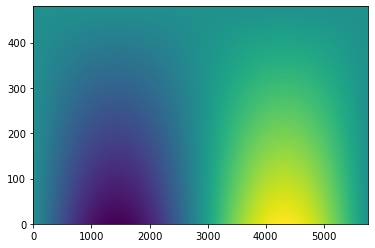

In [162]:
plt.pcolor(x_tides)

In [159]:
x_tides_IBCAO,y_tides_IBCAO=EASE2toIBCAO(x_tides,y_tides)

In [157]:
x_tides.shape

(480, 5761)

In [42]:
# x_tides,y_tides=P(tides_lon_g,tides_lat_g)

In [43]:
np.asarray(tides_lon_g).shape

(480, 5761)

In [166]:
x_tides_IBCAO.shape

(480, 5761)

In [165]:
tides.shape

(5761, 480)

In [167]:
#5mins+
#ATTENTION tides.T
tides_IBCAO=griddata((x_tides_IBCAO.ravel(),y_tides_IBCAO.ravel()),np.asarray(tides).T.ravel(),(xtest2,ytest2),method='nearest')




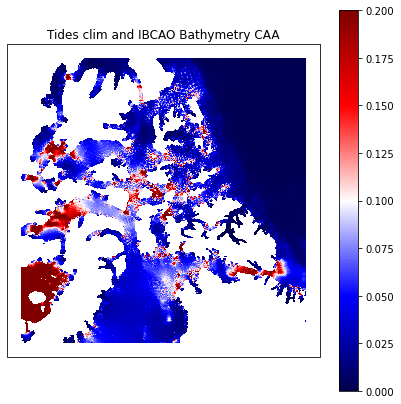

In [170]:
plt.figure(figsize=(7,7))
#CAA
ix1=5000
ix2=10000
iy1=1000
iy2=6000
#Russian shelves
# ix1=9000
# ix2=14000
# iy1=6500
# iy2=11500
ax = plt.axes(projection = Projection)
# plt.title('Average Roughness 2016 (Mean)')
plt.title('Tides clim and IBCAO Bathymetry CAA')

#CAA
# levels = [-3000,-2500,-2000,-1500,-1000,-750,-500,-400,-300,-200,-150,-100,-75,-50,-25,0]
#Russia
levels = [-3000,-2500,-2000,-1500,-1000,-750,-500,-400,-300,-200,-150,-100,-80,-60,-50,-40,-30,-20,-10,0]

# levels = np.arange(-1000, 0, 50)
plt.pcolormesh(xtest2[ix1:ix2,iy1:iy2], ytest2[ix1:ix2,iy1:iy2], tides_IBCAO[ix1:ix2,iy1:iy2], zorder=0 ,vmin=0, vmax=0.2, cmap='seismic')
# plt.contour(xtest2[ix1:ix2,iy1:iy2], ytest2[ix1:ix2,iy1:iy2], df.z[ix1:ix2,iy1:iy2], levels, vmin=-1000, vmax=0, linewidths=0.2, alpha=0.3, cmap='seismic')
# plt.pcolormesh(xtest2[ix1:ix2,iy1:iy2], ytest2[ix1:ix2,iy1:iy2], df.z[ix1:ix2,iy1:iy2], zorder=0 ,vmin=-1000, vmax=0, cmap='seismic')
# ax.add_feature(land_10m, zorder=1, edgecolor='black', linewidth=0.02)
plt.colorbar()
plt.savefig('Tides_IBCAO_bathy_CAA_large_alpha.png', dpi = 1400)
# plt.savefig('Tides_IBCAO_bathy_CAA_contourf_large_alpha.png', dpi = 1400)
# plt.savefig('Roughness_IBCAO_bathy_Russia_contourf_large_alpha.png', dpi = 1400)





/Users/micheltsamados/miniconda3/envs/icesat2020/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1598: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  shading=shading)


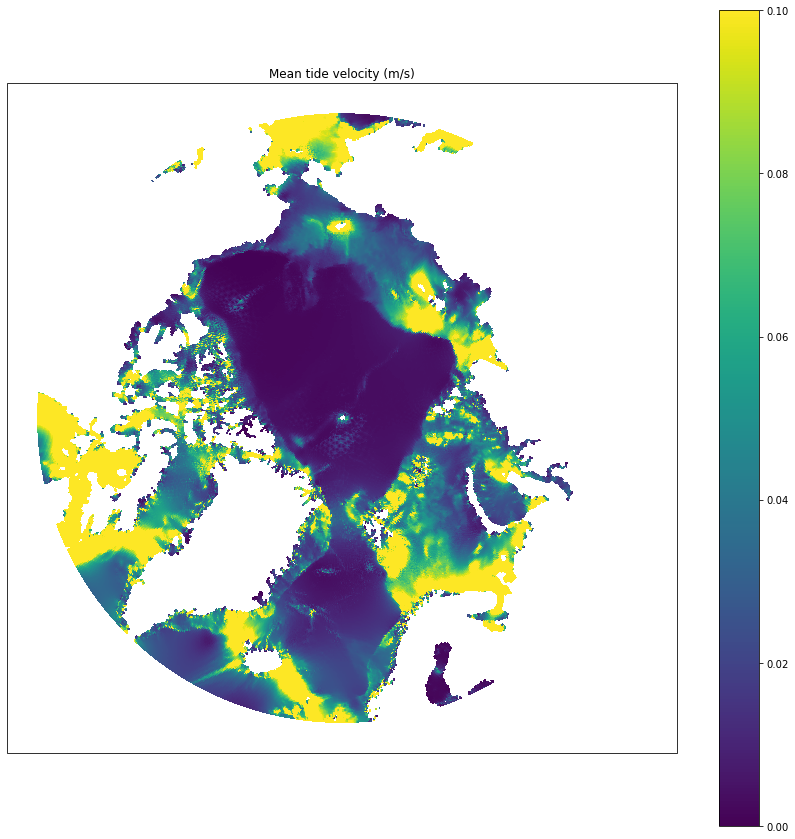

In [158]:
plt.figure(figsize=(15,15))

ax = plt.axes(projection = Projection)
plt.title('Mean tide velocity (m/s)')
s=2
plt.pcolormesh(x_tides[::s,::s], y_tides[::s,::s], tides[::s,::s].T, zorder=0 ,vmin=0, vmax=0.1)#, cmap='seismic')
# ax.add_feature(land_10m, zorder=1, edgecolor='black', linewidth=0.1)
plt.colorbar()
# plt.savefig('MeanVelocityTidesArctic.png', dpi = 400)




/Users/micheltsamados/miniconda3/envs/icesat2020/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1598: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  shading=shading)


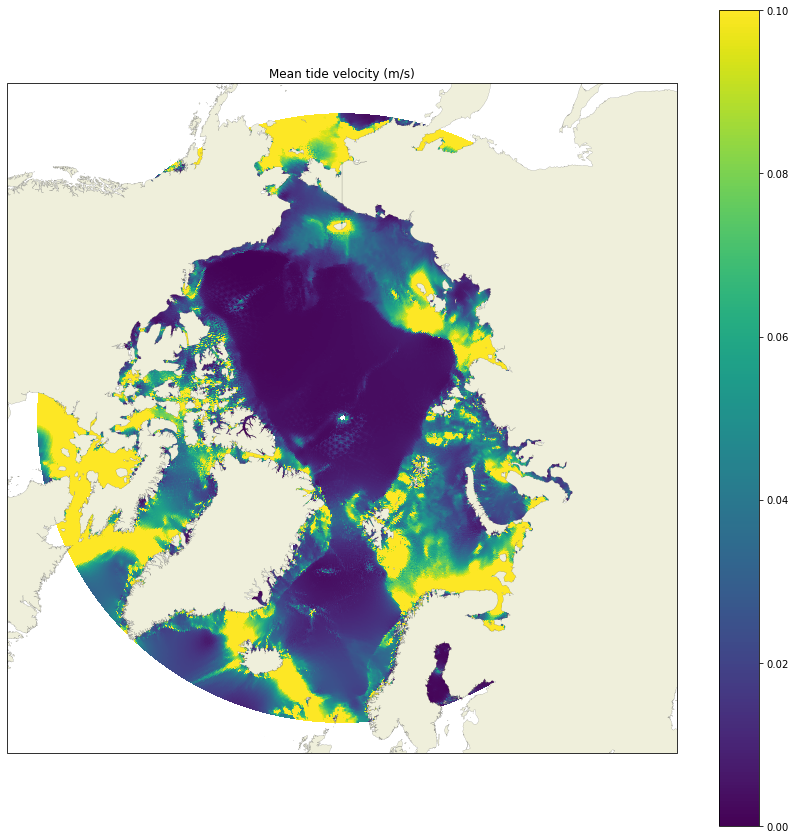

In [45]:
plt.figure(figsize=(15,15))

ax = plt.axes(projection = Projection)
plt.title('Mean tide velocity (m/s)')
s=2
plt.pcolormesh(x_tides[::s,::s], y_tides[::s,::s], tides[::s,::s].T, zorder=0 ,vmin=0, vmax=0.1)#, cmap='seismic')
ax.add_feature(land_10m, zorder=1, edgecolor='black', linewidth=0.1)
plt.colorbar()
# plt.savefig('MeanVelocityTidesArctic.png', dpi = 400)



In [47]:
! pwd


/Users/micheltsamados/Dropbox/ThomasJohnson/MISR_bathymetry


# Tidal mixing

In [174]:
! ls /Users/micheltsamados/Documents/Data/Tides/tidal_dissipation_diags/Arctic


bottom_friction_row-2019.01.huv.nc vertical_excursion-2019.01.huv.nc
bottom_friction_row-2019.02.huv.nc vertical_excursion-2019.02.huv.nc
bottom_friction_row-2019.03.huv.nc vertical_excursion-2019.03.huv.nc
bottom_friction_row-2019.04.huv.nc vertical_excursion-2019.04.huv.nc
bottom_friction_row-2019.05.huv.nc vertical_excursion-2019.05.huv.nc
bottom_friction_row-2019.06.huv.nc vertical_excursion-2019.06.huv.nc
bottom_friction_row-2019.07.huv.nc vertical_excursion-2019.07.huv.nc
bottom_friction_row-2019.08.huv.nc vertical_excursion-2019.08.huv.nc
bottom_friction_row-2019.09.huv.nc vertical_excursion-2019.09.huv.nc
bottom_friction_row-2019.10.huv.nc vertical_excursion-2019.10.huv.nc
bottom_friction_row-2019.11.huv.nc vertical_excursion-2019.11.huv.nc
bottom_friction_row-2019.12.huv.nc vertical_excursion-2019.12.huv.nc
files_nok


In [176]:
path_mixing='/Users/micheltsamados/Documents/Data/Tides/tidal_dissipation_diags/Arctic/'
# file_AA='meanvelocity_FES2014_Antarctica_Sept2017.nc'
file_B='vertical_excursion-2019.04.huv.nc'


data_vert_mixing=Dataset(path_mixing+file_B,"r")

In [180]:
data_vert_mixing.variables.keys()

dict_keys(['longitude', 'latitude', 'time', 'vertical_excursion'])

In [181]:
vert_mixing=data_vert_mixing.variables['vertical_excursion']
vert_mixing_lon=data_vert_mixing.variables['longitude']
vert_mixing_lat=data_vert_mixing.variables['latitude']

In [187]:
vert_mixing_lon_g, vert_mixing_lat_g = np.meshgrid(np.asarray(vert_mixing_lon), np.asarray(vert_mixing_lat))
x_vert_mixing,y_vert_mixing=WGS84toEASE2(vert_mixing_lon_g,vert_mixing_lat_g)
x_vert_mixing_IBCAO,y_vert_mixing_IBCAO=EASE2toIBCAO(x_vert_mixing,y_vert_mixing)


/Users/micheltsamados/miniconda3/envs/icesat2020/lib/python3.7/site-packages/ipykernel_launcher.py:18: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1


In [188]:
vert_mixing_lon_g.shape

(901, 5401)

In [189]:
vert_mixing.shape

(30, 901, 5401)

In [212]:
#5mins+
#15th day 
# vert_mixing_IBCAO=griddata((x_vert_mixing_IBCAO.ravel(),y_vert_mixing_IBCAO.ravel()),np.asarray(vert_mixing[15]).ravel(),(xtest2,ytest2),method='nearest')
#0th day 
vert_mixing_IBCAO_20190401=griddata((x_vert_mixing_IBCAO.ravel(),y_vert_mixing_IBCAO.ravel()),np.asarray(vert_mixing[0]).ravel(),(xtest2,ytest2),method='nearest')





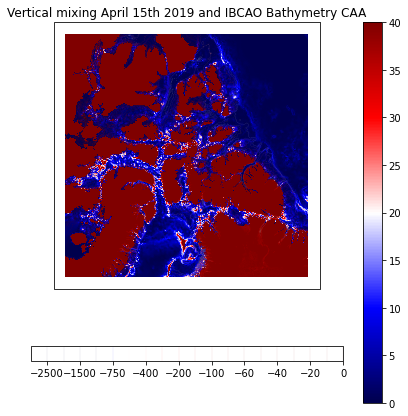

In [214]:
plt.figure(figsize=(7,7))
#CAA
ix1=5000
ix2=10000
iy1=1000
iy2=6000
#Russian shelves
# ix1=9000
# ix2=14000
# iy1=6500
# iy2=11500
ax = plt.axes(projection = Projection)
# plt.title('Average Roughness 2016 (Mean)')
plt.title('Vertical mixing April 15th 2019 and IBCAO Bathymetry CAA')

#CAA
# levels = [-3000,-2500,-2000,-1500,-1000,-750,-500,-400,-300,-200,-150,-100,-75,-50,-25,0]
#Russia
levels = [-3000,-2500,-2000,-1500,-1000,-750,-500,-400,-300,-200,-150,-100,-80,-60,-50,-40,-30,-20,-10,0]

# levels = np.arange(-1000, 0, 50)
C=ax.pcolormesh(xtest2[ix1:ix2,iy1:iy2], ytest2[ix1:ix2,iy1:iy2], vert_mixing_IBCAO_20190401[ix1:ix2,iy1:iy2], zorder=0 ,vmin=0, vmax=40, cmap='seismic')
# plt.pcolormesh(xtest2[ix1:ix2,iy1:iy2], ytest2[ix1:ix2,iy1:iy2], vert_mixing_IBCAO[ix1:ix2,iy1:iy2], zorder=0 ,vmin=0, vmax=40, cmap='seismic')
C2=ax.contour(xtest2[ix1:ix2,iy1:iy2], ytest2[ix1:ix2,iy1:iy2], df.z[ix1:ix2,iy1:iy2], levels, vmin=-1000, vmax=0, linewidths=0.2, alpha=0.3, cmap='seismic')
# plt.pcolormesh(xtest2[ix1:ix2,iy1:iy2], ytest2[ix1:ix2,iy1:iy2], df.z[ix1:ix2,iy1:iy2], zorder=0 ,vmin=-1000, vmax=0, cmap='seismic')
# ax.add_feature(land_10m, zorder=1, edgecolor='black', linewidth=0.02)
# plt.colorbar()
plt.colorbar(C, orientation='vertical')
plt.colorbar(C2, orientation='horizontal')


             
plt.savefig('Vertical_Mixing_20190401_IBCAO_bathy_CAA_large_alpha.png', dpi = 1400)
# plt.savefig('Tides_IBCAO_bathy_CAA_contourf_large_alpha.png', dpi = 1400)
# plt.savefig('Roughness_IBCAO_bathy_Russia_contourf_large_alpha.png', dpi = 1400)


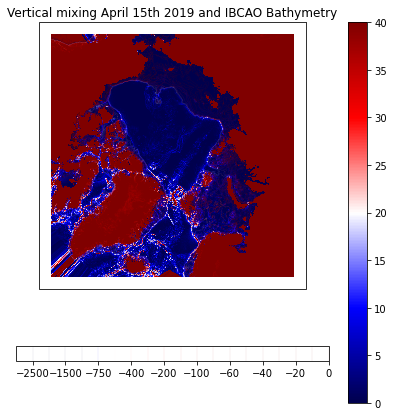

In [215]:
plt.figure(figsize=(7,7))

ax = plt.axes(projection = Projection)
# plt.title('Average Roughness 2016 (Mean)')
plt.title('Vertical mixing April 15th 2019 and IBCAO Bathymetry')

#CAA
# levels = [-3000,-2500,-2000,-1500,-1000,-750,-500,-400,-300,-200,-150,-100,-75,-50,-25,0]
#Russia
levels = [-3000,-2500,-2000,-1500,-1000,-750,-500,-400,-300,-200,-150,-100,-80,-60,-50,-40,-30,-20,-10,0]

# levels = np.arange(-1000, 0, 50)
C=ax.pcolormesh(xtest2, ytest2, vert_mixing_IBCAO_20190401, zorder=0 ,vmin=0, vmax=40, cmap='seismic')
# plt.pcolormesh(xtest2[ix1:ix2,iy1:iy2], ytest2[ix1:ix2,iy1:iy2], vert_mixing_IBCAO[ix1:ix2,iy1:iy2], zorder=0 ,vmin=0, vmax=40, cmap='seismic')
C2=ax.contour(xtest2, ytest2, df.z, levels, vmin=-1000, vmax=0, linewidths=0.2, alpha=0.3, cmap='seismic')
# plt.pcolormesh(xtest2[ix1:ix2,iy1:iy2], ytest2[ix1:ix2,iy1:iy2], df.z[ix1:ix2,iy1:iy2], zorder=0 ,vmin=-1000, vmax=0, cmap='seismic')
# ax.add_feature(land_10m, zorder=1, edgecolor='black', linewidth=0.02)
# plt.colorbar()
plt.colorbar(C, orientation='vertical')
plt.colorbar(C2, orientation='horizontal')


             
plt.savefig('Vertical_Mixing_20190401_IBCAO_bathy_panArctic_large_alpha.png', dpi = 1400)
# plt.savefig('Tides_IBCAO_bathy_CAA_contourf_large_alpha.png', dpi = 1400)
# plt.savefig('Roughness_IBCAO_bathy_Russia_contourf_large_alpha.png', dpi = 1400)

